# E-Commerce Behvior

In [ ]:
### to connect with data on drive

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Colab Notebooks

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [ ]:
### import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
import plotly.express as px

!pip install apyori
from apyori import apriori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5976 sha256=a9d8132c6fe0457c427ab4d4fc1d7905b23d857d2e38ef2313cbb44fcf41b730
  Stored in directory: /root/.cache/pip/wheels/32/2a/54/10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori


In [ ]:
## load data from 2 csv files for October & November

### data of October
df1 = pd.read_csv('Copy of Data 1.csv')

### load data of November
df2 = pd.read_csv('Copy of Data 2.csv')

### Merge the two dataframes of (df1 , df2) in one dataframe called full_data
# copy of data
copy_data = df1.append(df2)
# full_data
full_data = copy_data.copy()

<ipython-input-9-1b362e10fc10>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  copy_data = df1.append(df2)


In [ ]:
### print first 10 rows of data
full_data.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,NaN,lovely,13.48,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,NaN,runail,2.62,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,NaN,lovely,0.56,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
5,2019-10-01 00:00:16 UTC,cart,5857269,1487580005134238553,NaN,runail,2.62,430174032,73dea1e7-664e-43f4-8b30-d32b9d5af04f
6,2019-10-01 00:00:19 UTC,cart,5739055,1487580008246412266,NaN,kapous,4.75,377667011,81326ac6-daa4-4f0a-b488-fd0956a78733
7,2019-10-01 00:00:24 UTC,cart,5825598,1487580009445982239,NaN,NaN,0.56,467916806,2f5b5546-b8cb-9ee7-7ecd-84276f8ef486
8,2019-10-01 00:00:25 UTC,cart,5698989,1487580006317032337,NaN,NaN,1.27,385985999,d30965e8-1101-44ab-b45d-cc1bb9fae694
9,2019-10-01 00:00:26 UTC,view,5875317,2029082628195353599,NaN,NaN,1.59,474232307,445f2b74-5e4c-427e-b7fa-6e0a28b156fe


## Data OverView

In [ ]:
## data information
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8738120 entries, 0 to 4635836
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 666.7+ MB


In [ ]:
## data describtion for int data
full_data.describe()

,product_id,category_id,price,user_id
count,8.738120e+06,8.738120e+06,8.738120e+06,8.738120e+06
mean,5.475330e+06,1.547985e+18,8.315165e+00,5.042412e+08
std,1.313266e+06,1.606052e+17,1.895403e+01,8.354095e+07
min,3.752000e+03,1.487580e+18,-7.937000e+01,1.120748e+06
25%,5.723503e+06,1.487580e+18,2.050000e+00,4.694674e+08
50%,5.809910e+06,1.487580e+18,3.970000e+00,5.405799e+08
75%,5.854158e+06,1.487580e+18,6.780000e+00,5.611356e+08
max,5.909246e+06,2.195085e+18,3.277800e+02,5.799699e+08


## Data Cleaning & Validation

In [ ]:
# step1: transform categorical data from int to object
full_data['product_id'] = full_data['product_id'].astype('object')
full_data['category_id'] = full_data['category_id'].astype('object')
full_data['user_id'] = full_data['user_id'].astype('object')

In [ ]:
# step2: check duplicates data & drop it

print('Sum of duplicates = ' , full_data.duplicated().sum())

print('shape of data frame before dropping duplicates' , full_data.shape)

# drop duplicates data 

full_data.drop_duplicates(inplace = True)

print('shape of data frame after dropping duplicates' , full_data.shape)

Sum of duplicates =  459848
shape of data frame before dropping duplicates (8738120, 9)
shape of data frame after dropping duplicates (8278272, 9)


In [ ]:
# step3: Check Null values & handle it 

# percentage of null values 

(full_data.isnull().sum() / len(full_data)) * 100

event_time        0.000000
event_type        0.000000
product_id        0.000000
category_id       0.000000
category_code    98.321618
brand            41.690742
price             0.000000
user_id           0.000000
user_session      0.016054
dtype: float64

In [ ]:
## 1- drop column of category_code as it contain more than 98% Nan values

full_data.drop('category_code' , axis = 1 , inplace = True)

In [ ]:
# to handle nan value in column of brand
## 1- Extract from data unique product_id with it's brand name

unique_brand = full_data[['product_id' , 'brand']]
unique_brand.drop_duplicates(inplace = True)
unique_brand.dropna(axis = 0 , inplace = True)
print('shape of unique products with its brand name',unique_brand.shape)

#  2- drop brand column from full_data to recreate it & fix null value

full_data.drop('brand' , axis = 1 , inplace = True)

#  3- fetch each product_id in full data with product_id in unique_brand data

full_data = full_data.merge(unique_brand , on = 'product_id' , how = 'left')

#  4- Replace NULL value of brand column by unknown

full_data['brand'] = full_data['brand'].fillna('unknown')


<ipython-input-17-79233e676475>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_brand.drop_duplicates(inplace = True)
<ipython-input-17-79233e676475>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_brand.dropna(axis = 0 , inplace = True)


shape of unique products with its brand name (25828, 2)


In [ ]:
# Recheck nan value
(full_data.isnull().sum() / len(full_data)) * 100


event_time      0.000000
event_type      0.000000
product_id      0.000000
category_id     0.000000
price           0.000000
user_id         0.000000
user_session    0.016054
brand           0.000000
dtype: float64

In [ ]:
# drop nan value in user_session
full_data.dropna(axis = 0 , inplace = True)
# Recheck nan value
(full_data.isnull().sum() / len(full_data)) * 100

event_time      0.0
event_type      0.0
product_id      0.0
category_id     0.0
price           0.0
user_id         0.0
user_session    0.0
brand           0.0
dtype: float64

In [ ]:
# Step4 : Validate column of price
print('minimum price',full_data['price'].min())
print('maximum price',full_data['price'].max())
print('number of rows with negative price' , full_data[full_data['price'] < 0].shape )

# drop negative values

full_data = full_data[full_data['price'] > 0]

minimum price -79.37
maximum price 327.78
number of rows with negative price (36, 8)


## Data Engineering

In [ ]:
# step1 :changing the event_time coulmn from object type to datetime64
full_data['event_time'] = pd.to_datetime(full_data['event_time'])

In [ ]:
# step2 : Extract Month , Day , Hour from event_time
full_data["month"] = full_data['event_time'].dt.month_name()
full_data["day"] = full_data['event_time'].dt.day
full_data["hour"] = full_data['event_time'].dt.hour
full_data.head(5)

In [ ]:


full_data = full_data.sort_values(["user_id","event_time"])

t = timedelta(minutes = 30)
n = 0
full_data["Time_Interval"] =0
full_data["Time_difference"] =0

for i in range(len(full_data)-1):
  
  deff = full_data.iloc[i+1].event_time - full_data.iloc[i].event_time
  full_data.Time_difference.iloc[i] = deff
  full_data.Time_Interval.iloc[i] = n
  
  if full_data.iloc[i+1].user_id != full_data.iloc[i].user_id or deff > t:
    full_data.Time_difference.iloc[i] = timedelta(0)
    n += 1
full_data.Time_Interval.iloc[-1] = n

- After explore data in csv files of 'Data 1.csv' & 'Data 2.csv'
and handle some of it's problem we decide to save edited data into a new csv_file to save run time.

In [ ]:
#full_data.to_csv('new_clean_data.csv')

full_data = pd.read_csv('new_clean_data.csv')

In [ ]:
## new data info
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8718942 entries, 0 to 8718941
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   event_time      object 
 2   event_type      object 
 3   product_id      int64  
 4   category_id     int64  
 5   price           float64
 6   user_id         int64  
 7   user_session    object 
 8   brand           object 
 9   month           object 
 10  day             int64  
 11  hour            int64  
 12  Time_Interval   int64  
 13  Time_Interval2  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 931.3+ MB


In [ ]:
## drop index column
full_data.drop('Unnamed: 0' , axis = 1 , inplace = True)

In [ ]:
## step1: transform categorical data from int to object
full_data['product_id'] = full_data['product_id'].astype('object')
full_data['category_id'] = full_data['category_id'].astype('object')
full_data['user_id'] = full_data['user_id'].astype('object')

In [ ]:
## step1 :rechange the event_time coulmn from object type to datetime64
full_data['event_time'] = pd.to_datetime(full_data['event_time'])

## Exloratory Data Analysis (EDA)

 - Event_type count per month

<Axes: xlabel='month', ylabel='count'>

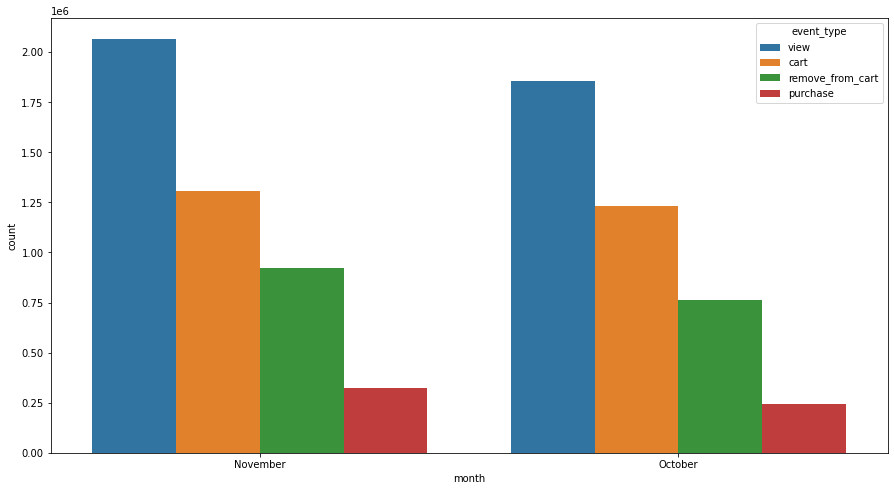

In [ ]:
plt.figure(figsize=(15,8))

sns.countplot(data = full_data , x = 'month' , hue = 'event_type')


- Number of categories on the platform

In [ ]:
full_data['category_id'].nunique()

499

- Number of total products on platform



In [ ]:
full_data['product_id'].nunique()

45421

- Number of products at each category

In [ ]:
### create product_df

products_df = full_data[['category_id' , 'product_id' ]]

## drop duplicates to get unique values 

products_df = products_df.drop_duplicates()

## groupby category id

products_df.groupby('category_id').product_id.count().sort_values(ascending = False).head(10)



category_id
1487580007675986893    2105
1487580013841613016    1820
1487580005595612013    1229
1487580008246412266     967
1487580005671109489     962
1487580006317032337     877
1487580011585077370     866
1487580005461394279     781
1658462125284131265     707
1487580005092295511     652
Name: product_id, dtype: int64

- Average sales for each category 

In [ ]:
### create category_df with sales

category_df = full_data[full_data['event_type'] == 'purchase'][['category_id' , 'price' ]]



## groupby category id

category_df.groupby('category_id').price.mean().sort_values(ascending = False).head(10)

category_id
2193074740619379535    161.963193
2187686850687140020    151.868889
2022622168218599898    121.480000
1487580006300255120     92.743402
1487580006174425994     67.630833
1801635223591453292     59.321200
1487580008011531230     55.523019
1487580008053474272     53.781333
2193074740686488401     52.510392
1487580008070251489     50.429231
Name: price, dtype: float64

- Number of unique users in October Vs November

712588
month
November    367980
October     399366
Name: user_id, dtype: int64


<Axes: xlabel='month', ylabel='count'>

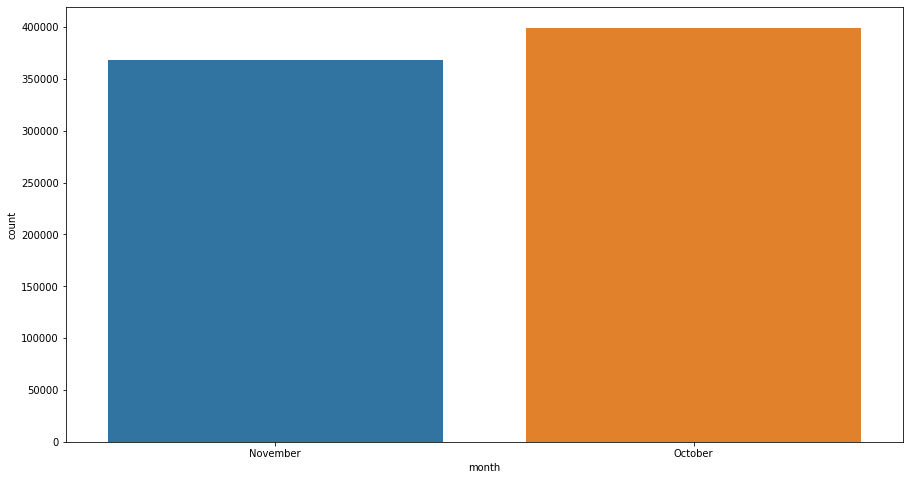

In [ ]:
print(full_data['user_id'].nunique())

## create dataframe of (user_id , month)

user_df = full_data[['user_id' , 'month']]

## drop duplicates to get unique users at each month

user_df = user_df.drop_duplicates()

## count users at each month 

print(user_df.groupby('month').user_id.count())

## by figure

plt.figure(figsize=(15,8))

sns.countplot(user_df , x = 'month')

In [ ]:
full_data.head()

,event_time,event_type,product_id,category_id,price,user_id,user_session,brand,month,day,hour,Time_Interval,Time_Interval2
0,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,runail,November,4,15,0,14 days 18:27:12
1,2019-11-19 09:56:09+00:00,view,5711145,1487580005008409427,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,f.o.x,November,19,9,1,0 days 01:18:39
2,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,2.30,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,grattol,November,19,11,2,1 days 00:43:18
3,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,unknown,November,20,11,3,0 days 00:00:21
4,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,unknown,November,20,11,3,0 days 00:01:12


- Total purchase for October vs November

<Axes: xlabel='month', ylabel='price'>

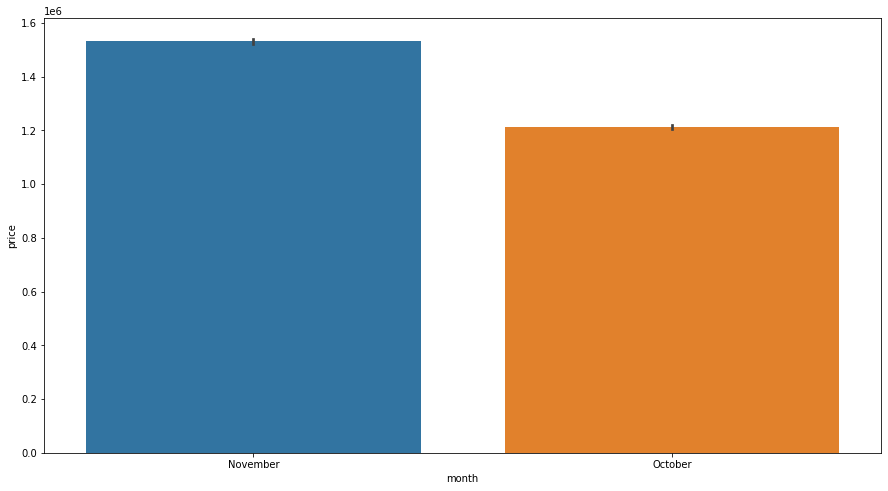

In [ ]:
plt.figure(figsize=(15,8))

purchase_df = full_data[full_data['event_type'] == 'purchase'][['month' , 'price' ]]

sns.barplot(data = purchase_df , x = 'month' , y = 'price' , estimator='sum')

- Average time that customer spent on the platform during the 2 months 

**show the difference between group by user session & group by our time interval**

In [ ]:
### create dataframe for users 

users_df = full_data[['user_id' , 'user_session' , 'event_time']]
## calc time spent on platform for each session
user_session_time = users_df.groupby('user_session').event_time.max() - users_df.groupby('user_session').event_time.min()
## convert serires to df
user_spent = user_session_time.to_frame()
## merge it with users_df
user_spent = user_spent.merge(users_df , on = 'user_session' , how = 'left')

In [ ]:
## drop event_time_y & rename event_time_x to spent_time

user_spent.drop('event_time_y' , axis = 1 , inplace = True)

In [ ]:
user_spent.columns = ['user_session' , 'time_spent_on' , 'user_id']

In [ ]:
user_spent = user_spent.drop_duplicates()

In [ ]:
user_spent.groupby('user_id').time_spent_on.sum().sort_values(ascending = False).head(10)

user_id
548292975   183 days 12:14:42
553436114    92 days 01:51:36
571955968    89 days 12:00:06
565737646    79 days 03:58:12
129297574    65 days 07:15:06
477578699    65 days 04:14:09
484267992    64 days 12:23:05
277253183    60 days 16:59:03
457754908    60 days 14:21:11
413934594    60 days 10:28:48
Name: time_spent_on, dtype: timedelta64[ns]

----------

In [ ]:
## to replace value of last row by n+1

full_data.Time_Interval.iloc[-1] = 1316117

<ipython-input-20-eb307af480ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data.Time_Interval.iloc[-1] = 1316117


In [ ]:
### create dataframe for users 

users_df = full_data[['user_id' , 'Time_Interval' , 'event_time']]
## calc time spent on platform for each session
user_session_time = users_df.groupby('Time_Interval').event_time.max() - users_df.groupby('Time_Interval').event_time.min()
## convert serires to df
user_spent = user_session_time.to_frame()
## merge it with users_df
user_spent = user_spent.merge(users_df , on = 'Time_Interval' , how = 'left')

In [ ]:
## drop event_time_y & rename event_time_x to spent_time

user_spent.drop('event_time_y' , axis = 1 , inplace = True)


In [ ]:
user_spent.columns = ['Time_Interval' , 'time_spent_on' , 'user_id']

In [ ]:
user_spent.shape

(8718942, 3)

In [ ]:
user_spent = user_spent.drop_duplicates()

In [ ]:
user_spent.groupby('user_id').time_spent_on.sum().sort_values(ascending = False).head(10)

user_id
557616099   9 days 07:15:41
557956487   6 days 22:48:18
531900924   4 days 09:55:24
550353491   3 days 21:13:10
352394658   3 days 07:39:39
526213023   3 days 00:16:53
443045778   2 days 17:39:49
475333301   2 days 10:57:31
553753653   2 days 07:09:26
479928991   2 days 06:08:33
Name: time_spent_on, dtype: timedelta64[ns]

## Help markting department by identify the following:

**1.	which products to feature in the next advertising campaigns and promotions**

In [ ]:
# MOST Purchased/demanding Product by UNIQUE User
all_purchase = full_data.query("event_type=='purchase'")[["product_id", "category_id", "price", "user_id", "user_session" , "month" ,  "brand" , "event_type"]]

most_purchased = all_purchase.groupby(["product_id" , "brand"]).user_id.nunique().rename("user_buys").sort_values(ascending=False).reset_index()

most_purchased = most_purchased.head(10)
most_purchased.to_csv('most_purchased.csv')

In [ ]:
most_purchased

,product_id,brand,user_buys
0,5809910,grattol,2348
1,5854897,irisk,1763
2,5751422,uno,1462
3,5700037,runail,1455
4,5802432,unknown,1349
5,5304,runail,1346
6,5815662,unknown,1284
7,5751383,uno,1264
8,5792800,unknown,1181
9,5809912,grattol,1160


In [ ]:
## least viewed products
all_views = full_data.query("event_type=='view'")[["product_id", "category_id", "price", "user_id", "user_session"]]

least_views = all_purchase.groupby(["product_id" , "brand"]).user_id.nunique().rename("user_view").sort_values(ascending=True).reset_index().head(10)

least_views

,product_id,brand,user_view
0,5909245,dewal,1
1,5842722,beautix,1
2,5842726,beautix,1
3,5842728,beautix,1
4,5842736,beautix,1
5,5842738,beautix,1
6,5703139,metzger,1
7,5703136,metzger,1
8,5703132,metzger,1
9,5703025,unknown,1


**2 - Which brands are customers most loyal to?**

In [ ]:
brand_purchase_count = all_purchase.groupby(["brand", 'user_id']).month.count().rename("purchase_count").reset_index()
brand_purchase_count

,brand,user_id,purchase_count
0,airnails,10280338,1
1,airnails,105697630,1
2,airnails,126051562,2
3,airnails,149936015,1
4,airnails,160905182,2
...,...,...,...
192813,zinger,579632103,1
192814,zinger,579681799,10
192815,zinger,579750441,1
192816,zinger,579849574,1


In [ ]:
avg_brand_purchase_count = brand_purchase_count.groupby("brand").purchase_count.mean().rename("loyality_Score").sort_values(ascending=False).reset_index()
avg_brand_purchase_count [1:]

,brand,loyality_Score
1,airnails,3.904357
2,masura,3.669987
3,bpw.style,3.510849
4,kinetics,3.096078
5,runail,2.856820
...,...,...
214,bespecial,1.000000
215,rocknailstar,1.000000
216,sawa,1.000000
217,fly,1.000000


**3- Who is the most valuable customers based on their purchase history**

In [ ]:

#  The User with the Highest Purchase Frequency

loyal_user_1 = full_data.query("event_type == 'purchase'")\
                        .groupby(["user_id", "Time_Interval"]).product_id.count().rename("timeinterval_purchase_count")\
                        .sort_values(ascending=False).reset_index()\
                        .groupby("user_id").Time_Interval.count().rename("timeinterval_purchase_count")\
                        .sort_values(ascending=False).reset_index()

loyal_user_1

,user_id,timeinterval_purchase_count
0,150318419,49
1,471197852,35
2,531900924,35
3,247216055,26
4,433079764,26
...,...,...
52518,516685100,1
52519,516694046,1
52520,516695237,1
52521,516695852,1


In [ ]:

loyal_user = full_data\
                        .groupby(["user_id", "Time_Interval"]).product_id.count().rename("timeinterval_count")\
                        .sort_values(ascending=False).reset_index()\
                        .groupby("user_id").Time_Interval.count().rename("timeinterval_count")\
                        .sort_values(ascending=False).reset_index()

loyal_user 

,user_id,timeinterval_count
0,550353491,269
1,526213023,248
2,550388516,244
3,531900924,239
4,352394658,230
...,...,...
712583,557331993,1
712584,557331963,1
712585,557331957,1
712586,557331950,1


In [ ]:
valuable_customers = loyal_user_1.merge(loyal_user , on = 'user_id' , how = 'inner')

valuable_customers['valuable_percent'] = ((valuable_customers['timeinterval_purchase_count'] / valuable_customers['timeinterval_count']) *100)

In [ ]:
valuable_customers.sort_values('timeinterval_purchase_count' , ascending= False , inplace = True)
valuable_customers.head(10)


,user_id,timeinterval_purchase_count,timeinterval_count,valuable_percent
0,150318419,49,168,29.166667
1,471197852,35,174,20.114943
2,531900924,35,239,14.644351
3,247216055,26,180,14.444444
4,433079764,26,229,11.353712
5,443045778,26,184,14.130435
6,549464624,25,74,33.783784
7,556450099,23,154,14.935065
8,396059467,22,153,14.379085
9,353644044,18,109,16.513761


**4- Are there any price trends for a particular product over time?**

In [ ]:
df = full_data.copy()

In [ ]:
df['days'] = df['event_time'].dt.round("D")

In [ ]:
df_prod_price = pd.pivot_table(df, index="days", columns=["product_id"], values = 'price' , aggfunc=np.mean)

print(df_prod_price.shape)

df_prod_price

(62, 45421)


product_id,3752,3762,3763,3771,3774,3776,3783,3788,3790,3806,...,5909236,5909237,5909238,5909239,5909240,5909241,5909242,5909244,5909245,5909246
days,,,,,,,,,,,,,,,,,,,,,
2019-10-01 00:00:00+00:00,NaN,19.370000,16.030000,NaN,16.030000,16.03,NaN,NaN,NaN,16.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-02 00:00:00+00:00,15.71,19.370000,16.030000,NaN,16.030000,16.03,NaN,NaN,7.92,16.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-03 00:00:00+00:00,NaN,19.370000,16.030000,NaN,16.030000,16.03,NaN,NaN,NaN,16.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-04 00:00:00+00:00,NaN,19.370000,NaN,NaN,16.030000,16.03,7.92,NaN,NaN,16.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-05 00:00:00+00:00,NaN,19.370000,16.030000,NaN,16.030000,16.03,NaN,NaN,NaN,16.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-27 00:00:00+00:00,NaN,19.370000,16.030000,NaN,16.030000,NaN,NaN,NaN,7.92,16.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-28 00:00:00+00:00,NaN,18.601321,15.718182,NaN,15.812222,15.54,NaN,NaN,7.92,15.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-29 00:00:00+00:00,NaN,18.400000,15.540000,NaN,15.540000,15.54,NaN,NaN,7.92,14.43,...,NaN,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
l = []
for i in range(len(df_prod_price.columns)):
    if len(df_prod_price.iloc[:,i].dropna().round(decimals = 3).unique()) >= 4 :
        l.append(df_prod_price.iloc[:,i])
    

In [ ]:
df_prod_price2 = pd.DataFrame(l).transpose()
df_prod_price2

,3762,3763,3774,3806,3928,3959,3978,4006,4119,4185,...,5906203,5906204,5906205,5906206,5906207,5906217,5906218,5906219,5906220,5906221
days,,,,,,,,,,,,,,,,,,,,,
2019-10-01 00:00:00+00:00,19.370000,16.030000,16.030000,16.03,16.030,16.0300,29.050000,16.030000,16.030000,19.370000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-02 00:00:00+00:00,19.370000,16.030000,16.030000,16.03,16.030,16.0300,29.050000,16.030000,16.030000,19.370000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-03 00:00:00+00:00,19.370000,16.030000,16.030000,16.03,16.030,16.0300,29.050000,16.030000,16.030000,19.370000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-04 00:00:00+00:00,19.370000,NaN,16.030000,16.03,16.030,16.0300,29.050000,16.030000,16.030000,19.370000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-05 00:00:00+00:00,19.370000,16.030000,16.030000,16.03,16.030,16.0300,NaN,16.030000,16.030000,19.370000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-27 00:00:00+00:00,19.370000,16.030000,16.030000,16.03,16.030,16.0300,29.050000,16.030000,16.030000,19.370000,...,7.940000,7.94,7.94,7.94,7.14000,173.81,187.300000,219.050000,273.020000,327.780000
2019-11-28 00:00:00+00:00,18.601321,15.718182,15.812222,15.43,15.785,15.8025,28.215714,15.803846,15.754375,18.981294,...,7.566667,7.84,7.30,7.24,6.55875,169.46,183.288571,210.707143,264.333636,321.402222
2019-11-29 00:00:00+00:00,18.400000,15.540000,15.540000,14.43,15.540,15.5400,27.590000,15.540000,15.540000,18.780000,...,7.380000,7.70,7.14,7.14,6.21000,165.11,177.940000,208.100000,259.370000,311.380000


In [ ]:
l = []
names = []
for c in df_prod_price2:
  l_sales = df_prod_price2[c]
  trend_l =[]
  for i in range(len(df_prod_price2[c])-2):
    trend_l.append(np.nanmean(l_sales[i:i+3]))
  l.append(trend_l)
  names.append(c)

<ipython-input-41-6566f9a1d91d>:7: RuntimeWarning: Mean of empty slice
  trend_l.append(np.nanmean(l_sales[i:i+3]))


In [ ]:
df_prod_trend = pd.DataFrame(l)
df_prod_trend['Product']=names
df_prod_trend.set_index('Product', inplace = True)
df_prod_trend = df_prod_trend.transpose()
df_prod_trend["time"] = list(df_prod_price.index)[1:-1]
df_prod_trend = df_prod_trend.set_index("time")
df_prod_trend

Product,3762,3763,3774,3806,3928,3959,3978,4006,4119,4185,...,5906203,5906204,5906205,5906206,5906207,5906217,5906218,5906219,5906220,5906221
time,,,,,,,,,,,,,,,,,,,,,
2019-10-02 00:00:00+00:00,19.370000,16.030000,16.030000,16.030000,16.030000,16.030000,29.050000,16.030000,16.030000,19.370000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-03 00:00:00+00:00,19.370000,16.030000,16.030000,16.030000,16.030000,16.030000,29.050000,16.030000,16.030000,19.370000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-04 00:00:00+00:00,19.370000,16.030000,16.030000,16.030000,16.030000,16.030000,29.050000,16.030000,16.030000,19.370000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-05 00:00:00+00:00,19.370000,16.030000,16.030000,16.030000,16.030000,16.030000,29.050000,16.030000,16.030000,19.370000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-06 00:00:00+00:00,19.370000,16.030000,16.030000,16.030000,16.030000,16.030000,29.050000,16.030000,16.030000,19.370000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-07 00:00:00+00:00,19.370000,16.030000,16.030000,16.030000,16.030000,16.030000,29.050000,16.030000,16.030000,19.370000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-08 00:00:00+00:00,19.370000,16.030000,16.030000,16.030000,16.030000,16.030000,29.050000,16.030000,16.030000,19.370000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09 00:00:00+00:00,19.370000,16.030000,16.030000,16.030000,16.030000,16.030000,29.050000,16.030000,16.030000,19.370000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-10 00:00:00+00:00,19.370000,16.030000,16.030000,16.030000,16.030000,16.030000,29.050000,16.030000,16.030000,19.370000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
a = []
b = []
c = []

for i in df_prod_trend:
  a.append(int(i))
  b.append(df_prod_trend[i].loc[df_prod_trend[i].first_valid_index()])
  c.append(df_prod_trend[i].loc[df_prod_trend[i].last_valid_index()])



In [ ]:
d = pd.DataFrame([a,b,c]).transpose()
d

,0,1,2
0,3762.0,19.370000,18.408739
1,3763.0,16.030000,15.540000
2,3774.0,16.030000,15.540000
3,3806.0,16.030000,14.430000
4,3928.0,16.030000,15.540000
...,...,...,...
10684,5906217.0,171.324286,165.110000
10685,5906218.0,180.492727,177.940000
10686,5906219.0,219.050000,208.100000
10687,5906220.0,271.503333,259.370000


In [ ]:
d["Diffrence"] = d[2]-d[1]
d

,0,1,2,Diffrence
0,3762.0,19.370000,18.408739,-0.961261
1,3763.0,16.030000,15.540000,-0.490000
2,3774.0,16.030000,15.540000,-0.490000
3,3806.0,16.030000,14.430000,-1.600000
4,3928.0,16.030000,15.540000,-0.490000
...,...,...,...,...
10684,5906217.0,171.324286,165.110000,-6.214286
10685,5906218.0,180.492727,177.940000,-2.552727
10686,5906219.0,219.050000,208.100000,-10.950000
10687,5906220.0,271.503333,259.370000,-12.133333


In [ ]:
d["abs_Diffrence"] = abs(d["Diffrence"])
d

,0,1,2,Diffrence,abs_Diffrence
0,3762.0,19.370000,18.408739,-0.961261,0.961261
1,3763.0,16.030000,15.540000,-0.490000,0.490000
2,3774.0,16.030000,15.540000,-0.490000,0.490000
3,3806.0,16.030000,14.430000,-1.600000,1.600000
4,3928.0,16.030000,15.540000,-0.490000,0.490000
...,...,...,...,...,...
10684,5906217.0,171.324286,165.110000,-6.214286,6.214286
10685,5906218.0,180.492727,177.940000,-2.552727,2.552727
10686,5906219.0,219.050000,208.100000,-10.950000,10.950000
10687,5906220.0,271.503333,259.370000,-12.133333,12.133333


In [ ]:
d2 = d.sort_values("abs_Diffrence", ascending = False).head(10)

In [ ]:
top_trends = list(d2[0])

In [ ]:
Top_10_Trend_TrendTable = df_prod_trend[df_prod_trend.columns.intersection(top_trends)]
Top_10_Trend_TrendTable

Product,5649829,5654270,5715532,5767004,5771614,5834486,5856185,5869278,5873058,5877795
time,,,,,,,,,,
2019-10-02 00:00:00+00:00,47.290000,105.790000,95.710000,103.970000,150.790000,126.520000,183.330000,86.510000,87.140000,158.730000
2019-10-03 00:00:00+00:00,47.290000,105.790000,95.710000,103.970000,150.790000,126.520000,183.330000,86.510000,87.140000,158.730000
2019-10-04 00:00:00+00:00,47.290000,NaN,95.710000,103.970000,150.790000,126.520000,183.330000,86.510000,NaN,158.730000
2019-10-05 00:00:00+00:00,47.290000,105.790000,95.710000,103.970000,150.790000,126.520000,183.330000,86.510000,NaN,158.730000
2019-10-06 00:00:00+00:00,47.290000,105.790000,95.710000,103.970000,150.790000,126.520000,183.330000,86.510000,85.398000,158.730000
2019-10-07 00:00:00+00:00,47.290000,102.263333,95.710000,103.970000,150.790000,126.520000,183.330000,86.510000,81.914000,158.730000
2019-10-08 00:00:00+00:00,47.290000,98.736667,95.710000,103.970000,150.790000,126.520000,183.330000,86.510000,80.752667,158.730000
2019-10-09 00:00:00+00:00,47.290000,95.210000,95.710000,103.970000,150.790000,126.520000,183.330000,86.510000,78.430000,158.730000
2019-10-10 00:00:00+00:00,47.290000,95.210000,95.710000,103.970000,150.790000,126.520000,183.330000,86.510000,78.430000,158.730000


In [ ]:
Top_10_Trend_PriceTable = df_prod_price2[df_prod_price2.columns.intersection(top_trends)]
Top_10_Trend_PriceTable

,5649829,5654270,5715532,5767004,5771614,5834486,5856185,5869278,5873058,5877795
days,,,,,,,,,,
2019-10-01 00:00:00+00:00,47.29,NaN,95.710,103.970000,150.790000,126.520,183.33,86.51,NaN,NaN
2019-10-02 00:00:00+00:00,47.29,105.79,95.710,103.970000,150.790000,126.520,183.33,86.51,87.14,158.730000
2019-10-03 00:00:00+00:00,47.29,NaN,95.710,103.970000,150.790000,126.520,183.33,86.51,NaN,158.730000
2019-10-04 00:00:00+00:00,47.29,NaN,95.710,103.970000,150.790000,126.520,183.33,86.51,NaN,158.730000
2019-10-05 00:00:00+00:00,47.29,NaN,95.710,103.970000,150.790000,126.520,183.33,NaN,NaN,158.730000
...,...,...,...,...,...,...,...,...,...,...
2019-11-27 00:00:00+00:00,94.59,NaN,159.520,103.970000,150.790000,126.520,183.33,NaN,NaN,158.730000
2019-11-28 00:00:00+00:00,NaN,84.63,151.545,85.060909,127.791695,117.031,169.58,56.22,NaN,151.674444
2019-11-29 00:00:00+00:00,NaN,NaN,127.620,77.970000,105.560000,94.890,155.83,56.22,NaN,126.980000


## Define a KPI that measures customer loyalty from the data**
 **We choose to measure customer loyality by using RFM Analysis model.**

RFM Define as (recency, frequency, monetary)


*   **Recency**: How recent was the customer's last purchase? Customers who recently made a purchase will still have the product on their mind and are more likely to purchase or use the product again. Businesses often measure recency in days. But, depending on the product, they may measure it in years, weeks or even hours.

*   **Frequency**: How often did this customer make a purchase in a given period? Customers who purchased once are often are more likely to purchase again. Additionally, first time customers may be good targets for follow-up advertising to convert them into more frequent customers.

*   **Monetary**: How much money did the customer spend in a given period? Customers who spend a lot of money are more likely to spend money in the future and have a high value to a business.

- Part 1: start with select dataset and prepare it for RFM Analysis

We create a new dataset with selected the rows and columns needed

In [ ]:
full_data.head(3)

,event_time,event_type,product_id,category_id,price,user_id,user_session,brand,month,day,hour,Time_Interval,Time_Interval2
0,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,runail,November,4,15,0,14 days 18:27:12
1,2019-11-19 09:56:09+00:00,view,5711145,1487580005008409427,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,f.o.x,November,19,9,1,0 days 01:18:39
2,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,2.30,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,grattol,November,19,11,2,1 days 00:43:18


In [ ]:
## select dataset with customers who purchased only

rfm_df = full_data[full_data['event_type'] == 'purchase']

In [ ]:
## select needed columns

rfm_df = rfm_df[['user_id' , 'event_type' , 'user_session' ,'Time_Interval', 'price','brand', 'product_id','category_id' , 'event_time']]
rfm_df.head(5)

,user_id,event_type,user_session,Time_Interval,price,brand,product_id,category_id,event_time
247,9794320,purchase,30d70cc3-86ee-4b5d-879c-40f06132163c,20,2.48,irisk,5812033,1487580005427839846,2019-11-25 05:07:13+00:00
248,9794320,purchase,30d70cc3-86ee-4b5d-879c-40f06132163c,20,2.48,irisk,5724621,1487580005427839846,2019-11-25 05:07:13+00:00
249,9794320,purchase,30d70cc3-86ee-4b5d-879c-40f06132163c,20,5.24,grattol,5809910,1602943681873052386,2019-11-25 05:07:13+00:00
250,9794320,purchase,30d70cc3-86ee-4b5d-879c-40f06132163c,20,2.48,irisk,5811668,1487580005427839846,2019-11-25 05:07:13+00:00
272,10079204,purchase,f873d16b-4efa-4e92-81be-92948aef2ff5,24,12.25,kaaral,5766379,1783999067156644376,2019-11-06 10:43:30+00:00


In [ ]:
rfm_df["month"] = rfm_df['event_time'].dt.month_name()
rfm_df.head(3)

,user_id,event_type,user_session,Time_Interval,price,brand,product_id,category_id,event_time,month
247,9794320,purchase,30d70cc3-86ee-4b5d-879c-40f06132163c,20,2.48,irisk,5812033,1487580005427839846,2019-11-25 05:07:13+00:00,November
248,9794320,purchase,30d70cc3-86ee-4b5d-879c-40f06132163c,20,2.48,irisk,5724621,1487580005427839846,2019-11-25 05:07:13+00:00,November
249,9794320,purchase,30d70cc3-86ee-4b5d-879c-40f06132163c,20,5.24,grattol,5809910,1602943681873052386,2019-11-25 05:07:13+00:00,November


In [ ]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568004 entries, 247 to 8718524
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   user_id        568004 non-null  object             
 1   event_type     568004 non-null  object             
 2   user_session   568004 non-null  object             
 3   Time_Interval  568004 non-null  int64              
 4   price          568004 non-null  float64            
 5   brand          568004 non-null  object             
 6   product_id     568004 non-null  object             
 7   category_id    568004 non-null  object             
 8   event_time     568004 non-null  datetime64[ns, UTC]
 9   month          568004 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(7)
memory usage: 47.7+ MB


- Part 2: we grouped data by user_id to calculate (recency, frequency, monetary)

In [ ]:
## Calculating Recency

df_recency = rfm_df.groupby(by = 'user_id' , as_index=False)['event_time'].max()

df_recency.columns = ['user_id', 'LastPurchaseDate']

recent_date = df_recency['LastPurchaseDate'].max()

df_recency['recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)

df_recency.head()

,user_id,LastPurchaseDate,recency
0,9794320,2019-11-25 05:07:13+00:00,5
1,10079204,2019-11-06 10:43:30+00:00,24
2,10280338,2019-11-21 11:31:09+00:00,9
3,15781728,2019-11-16 23:37:59+00:00,13
4,19762782,2019-11-10 19:22:01+00:00,20


In [ ]:
## Calculating Frequency

df_frequency = rfm_df.groupby(by = 'user_id' , as_index=False)['event_time'].count()

df_frequency.columns = ['user_id' , 'frequency']

df_frequency.head()

,user_id,frequency
0,9794320,4
1,10079204,2
2,10280338,16
3,15781728,2
4,19762782,8


In [ ]:
## Calculating Monetary Value

df_monetary = rfm_df.groupby(by = 'user_id' , as_index=False)['price'].sum()

df_monetary.columns = ['user_id' , 'monetary']

df_monetary.head()

,user_id,monetary
0,9794320,12.68
1,10079204,25.81
2,10280338,54.83
3,15781728,20.31
4,19762782,80.29


- Part 3: We merged the 3 datasets of recency, frequency, monetary in one dataframe

In [ ]:
## merging recency_df with frequency_df in one dataset called rf_df

rf_df = df_recency.merge(df_frequency , on = 'user_id')

## merging rf_df dataset with df_monetary in one dataframe called rfm_df

rfm_df = rf_df.merge(df_monetary , on = 'user_id')

In [ ]:
rfm_df

,user_id,LastPurchaseDate,recency,frequency,monetary
0,9794320,2019-11-25 05:07:13+00:00,5,4,12.68
1,10079204,2019-11-06 10:43:30+00:00,24,2,25.81
2,10280338,2019-11-21 11:31:09+00:00,9,16,54.83
3,15781728,2019-11-16 23:37:59+00:00,13,2,20.31
4,19762782,2019-11-10 19:22:01+00:00,20,8,80.29
...,...,...,...,...,...
52518,579906406,2019-11-30 21:07:34+00:00,0,2,9.68
52519,579916096,2019-11-30 21:23:59+00:00,0,4,9.42
52520,579924768,2019-11-30 21:55:55+00:00,0,3,8.54
52521,579925377,2019-11-30 21:47:31+00:00,0,6,38.23


- Part 4: Calculate rank of recency, frequency,and monetary

In [ ]:
## calc r_rank for recency
rfm_df['r_rank'] = rfm_df['recency'].rank(pct=True)
## calc f_rank for frequency
rfm_df['f_rank'] = rfm_df['frequency'].rank(pct=True)
## calc m_rank for monetary
rfm_df['m_rank'] = rfm_df['monetary'].rank(pct=True)


rfm_df.head(5)

,user_id,LastPurchaseDate,recency,frequency,monetary,r_rank,f_rank,m_rank
0,9794320,2019-11-25 05:07:13+00:00,5,4,12.68,0.141633,0.334111,0.155541
1,10079204,2019-11-06 10:43:30+00:00,24,2,25.81,0.524780,0.142480,0.406565
2,10280338,2019-11-21 11:31:09+00:00,9,16,54.83,0.270348,0.807656,0.722569
3,15781728,2019-11-16 23:37:59+00:00,13,2,20.31,0.345772,0.142480,0.318660
4,19762782,2019-11-10 19:22:01+00:00,20,8,80.29,0.451840,0.581555,0.830436


- part 5: calculate RFM_score

the formula used for this calculation is: 0.15 *Recency score + 0.28 *Frequency score + 0.57 *Monetary score

In [ ]:
## calc RFM_score
rfm_df['RFM_score'] = (0.15 * rfm_df['r_rank'] + 0.28 * rfm_df['f_rank'] + 0.57 * rfm_df['m_rank'] ) * 100
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df.head()

,user_id,LastPurchaseDate,recency,frequency,monetary,r_rank,f_rank,m_rank,RFM_score
0,9794320,2019-11-25 05:07:13+00:00,5,4,12.68,0.14,0.33,0.16,1.02
1,10079204,2019-11-06 10:43:30+00:00,24,2,25.81,0.52,0.14,0.41,1.75
2,10280338,2019-11-21 11:31:09+00:00,9,16,54.83,0.27,0.81,0.72,3.39
3,15781728,2019-11-16 23:37:59+00:00,13,2,20.31,0.35,0.14,0.32,1.37
4,19762782,2019-11-10 19:22:01+00:00,20,8,80.29,0.45,0.58,0.83,3.52


- Part 6: segment customers into (Loyal, High value Customer, low value Customer, Sleep Customer, and Lost) depending on their RFM_score

In [ ]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_score'] > 1.6,
                           'Low Value Customers', 'Lost Customers'))))))

In [ ]:
rfm_df

,user_id,LastPurchaseDate,recency,frequency,monetary,r_rank,f_rank,m_rank,RFM_score,Customer_segment
0,9794320,2019-11-25 05:07:13+00:00,5,4,12.68,0.14,0.33,0.16,1.02,Lost Customers
1,10079204,2019-11-06 10:43:30+00:00,24,2,25.81,0.52,0.14,0.41,1.75,Low Value Customers
2,10280338,2019-11-21 11:31:09+00:00,9,16,54.83,0.27,0.81,0.72,3.39,Medium Value Customer
3,15781728,2019-11-16 23:37:59+00:00,13,2,20.31,0.35,0.14,0.32,1.37,Lost Customers
4,19762782,2019-11-10 19:22:01+00:00,20,8,80.29,0.45,0.58,0.83,3.52,Medium Value Customer
...,...,...,...,...,...,...,...,...,...,...
52518,579906406,2019-11-30 21:07:34+00:00,0,2,9.68,0.01,0.14,0.06,0.39,Lost Customers
52519,579916096,2019-11-30 21:23:59+00:00,0,4,9.42,0.01,0.33,0.05,0.62,Lost Customers
52520,579924768,2019-11-30 21:55:55+00:00,0,3,8.54,0.01,0.24,0.04,0.47,Lost Customers
52521,579925377,2019-11-30 21:47:31+00:00,0,6,38.23,0.01,0.48,0.55,2.25,Low Value Customers


In [ ]:
rfm_df.shape

(52523, 10)

In [ ]:
full_data = full_data.merge(rfm_df[['user_id' , 'Customer_segment']] , on = 'user_id' , how = 'left')

In [ ]:
full_data.isna().sum()

event_time                0
event_type                0
product_id                0
category_id               0
price                     0
user_id                   0
user_session              0
brand                     0
month                     0
day                       0
hour                      0
Time_Interval             0
Time_Interval2            0
Customer_segment    4063012
dtype: int64

In [ ]:
full_data['Customer_segment'] = full_data['Customer_segment'].fillna('Viewer')

In [ ]:
full_data.isna().sum()

event_time          0
event_type          0
product_id          0
category_id         0
price               0
user_id             0
user_session        0
brand               0
month               0
day                 0
hour                0
Time_Interval       0
Time_Interval2      0
Customer_segment    0
dtype: int64

In [ ]:
full_data

,event_time,event_type,product_id,category_id,price,user_id,user_session,brand,month,day,hour,Time_Interval,Time_Interval2,Customer_segment
0,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,runail,November,4,15,0,14 days 18:27:12,Viewer
1,2019-11-19 09:56:09+00:00,view,5711145,1487580005008409427,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,f.o.x,November,19,9,1,0 days 01:18:39,Viewer
2,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,2.30,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,grattol,November,19,11,2,1 days 00:43:18,Viewer
3,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,unknown,November,20,11,3,0 days 00:00:21,Viewer
4,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,unknown,November,20,11,3,0 days 00:01:12,Viewer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8718937,2019-11-30 23:56:14+00:00,view,5892179,1487580013950664926,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,unknown,November,30,23,1316115,0 days 00:00:03,Viewer
8718938,2019-11-30 23:56:17+00:00,view,5900651,1487580013950664926,19.52,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,unknown,November,30,23,1316115,0 days 00:00:04,Viewer
8718939,2019-11-30 23:56:21+00:00,view,5892179,1487580013950664926,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,unknown,November,30,23,1316115,0 days 00:00:25,Viewer
8718940,2019-11-30 23:56:46+00:00,view,5790563,1487580008263189483,7.14,579968937,878af093-7570-48ae-966c-d50ce61e390c,unknown,November,30,23,1316116,0 days 00:03:12,Viewer


In [ ]:
## save final data into csv file
#full_data.to_csv('final_data1.csv')


## Design recommendation engine using association analysis

In [ ]:
### df as copy from full_data
df = full_data.copy()

In [ ]:
# # one hot incoding 
# model_data = (df[df['event_type'] =="purchase"]
#           .groupby(['Time_Interval', 'product_id'])['event_type']
#           .count().unstack().reset_index().fillna(0)
#           .set_index('Time_Interval'))

In [ ]:
### step 1: create boolean column 
df['Quantity']= True
print(df.shape)

# step 2: group product_id by Time_Interval
df2 = (df[df['event_type'] =="purchase"]
          .groupby(['Time_Interval', 'product_id'])['Quantity']
          .sum())

# step 3: create list for model data
model_data = []
user_s = df2.reset_index().Time_Interval

for i in user_s:
  model_data.append(list(df2.loc[i].index))

# check data
model_data

(8718942, 15)


[[5724621, 5809910, 5811668, 5812033],
 [5724621, 5809910, 5811668, 5812033],
 [5724621, 5809910, 5811668, 5812033],
 [5724621, 5809910, 5811668, 5812033],
 [5614842, 5766379],
 [5614842, 5766379],
 [5809910,
  5809911,
  5809912,
  5862544,
  5870648,
  5903807,
  5904295,
  5904346,
  5904799,
  5906175],
 [5809910,
  5809911,
  5809912,
  5862544,
  5870648,
  5903807,
  5904295,
  5904346,
  5904799,
  5906175],
 [5809910,
  5809911,
  5809912,
  5862544,
  5870648,
  5903807,
  5904295,
  5904346,
  5904799,
  5906175],
 [5809910,
  5809911,
  5809912,
  5862544,
  5870648,
  5903807,
  5904295,
  5904346,
  5904799,
  5906175],
 [5809910,
  5809911,
  5809912,
  5862544,
  5870648,
  5903807,
  5904295,
  5904346,
  5904799,
  5906175],
 [5809910,
  5809911,
  5809912,
  5862544,
  5870648,
  5903807,
  5904295,
  5904346,
  5904799,
  5906175],
 [5809910,
  5809911,
  5809912,
  5862544,
  5870648,
  5903807,
  5904295,
  5904346,
  5904799,
  5906175],
 [5809910,
  5809911,
  5

In [ ]:
len(df.Time_Interval.unique()) * len(df[df['event_type'] =="purchase"])

747560288472

**About 750 Billion !**

In [ ]:
n=0
for i in range(len(model_data)):
  n += len(model_data[i]) 
print(n)

10502949


**About 10.5 Million** 

In [ ]:
(len(df.Time_Interval.unique()) * len(df[df['event_type'] =="purchase"]))/n

71176.22759779182

**Data size decreased 70 thousand times!**

In [ ]:
print(len(model_data))
print(len(df.product_id.unique()))

563495
45421


In [ ]:
# Avrage support
n = 0
L = []
d = df.product_id.unique()
for i in d:
  n = 0
  for x in model_data:
    if i in x:
      n += 1
  L.append(n)

In [ ]:
# Above avrage support
avrage_support = np.mean(L)/len(model_data)
print(avrage_support)

0.0012463486882529954


### Training Model

In [ ]:
## training model
association_rules = apriori(model_data , min_support=0.00125, min_confidence=0.5, min_lift=1, min_length=2)
association_results = list(association_rules)

In [ ]:
## lenght of results
len(association_results)

In [ ]:
association_results[1]

RelationRecord(items=frozenset({4554, 4607}), support=0.005323915917621274, ordered_statistics=[OrderedStatistic(items_base=frozenset({4554}), items_add=frozenset({4607}), confidence=0.5498533724340177, lift=33.49255497780854)])

### Showing predictions by different ways

In [ ]:
## create Dataframe for products predictions
prod_l = []
for items in association_results:  
    products = items[0] 
    product = [x for x in products]       

    val1 = str(product[0]) 
    val2 = str(product[1:]) 
    Support = str(items[1])
    Confidence = str(items[2][0][2])
    Lift = str(items[2][0][3])
    rows = (val1 , val2 , Support, Confidence, Lift)
    prod_l.append(rows)

prod_df = pd.DataFrame(prod_l).rename({0:"Item_base",1:"items_to_add",2:"Support",3:"Confidence",4:"Lift"}, axis='columns')
prod_df[["Support","Confidence","Lift"]] = prod_df[["Support","Confidence","Lift"]].astype(float)

prod_df.to_csv("prod_df2.csv")
prod_df


,Item_base,items_to_add,Support,Confidence,Lift
0,4600,[4554],0.005640,0.582478,31.475206
1,4554,[4607],0.005324,0.549853,33.492555
2,4600,[4607],0.008238,0.501784,27.114743
3,5745313,[5745314],0.005993,0.692576,65.174189
4,5749145,[5749149],0.005949,0.791873,30.119250
5,5749154,[5749149],0.008037,0.751203,28.572316
6,5819114,[5833334],0.008282,0.526156,17.910236
7,5843545,[5843546],0.005516,0.628387,53.854402
8,5883314,[5858981],0.005287,0.562925,50.550680
9,5862936,[5862943],0.006834,0.659757,32.711801


In [ ]:
## create dictionary grouping products predictions
prod_dict = {}


for items in association_results:  
  products = items[0] 
  product = [x for x in products]
  prod_dict.setdefault(product[0], []).append(product[1:])


prod_dict

{4600: [[4554], [4607]],
 4554: [[4607]],
 5745313: [[5745314]],
 5749145: [[5749149]],
 5749154: [[5749149]],
 5819114: [[5833334]],
 5843545: [[5843546]],
 5883314: [[5858981]],
 5862936: [[5862943]],
 5864736: [[5864737]]}

In [ ]:
## create function for products predictions
def predict_items(x , min_confidence = 0.5 , min_Support = 0 ):
  if str(x) in list(prod_df.Item_base):
    df4 = prod_df[prod_df.Item_base ==  str(x)]
    df4 = df4[df4.Confidence >= min_confidence]
    df4 = df4[df4.Support >= min_Support].reset_index().iloc[:,2:]
    
    return(df4)

In [ ]:
## function test 2
x = predict_items(4600  ,  min_confidence = 0.5)

## function output
x

,items_to_add,Support,Confidence,Lift
0,[4554],0.005640,0.582478,31.475206
1,[4607],0.008238,0.501784,27.114743
